<a href="https://colab.research.google.com/github/dil150898/Email-Campaign-Effectiveness-Prediction/blob/main/dil_khush_Email_Campaign_Effectiveness_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    **- Email Campaign Effectiveness Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**Vaibhav Kumar Gupta
##### **Team Member 2 -**Bhavik Verma
##### **Team Member 3 -**Priyanka Pal
##### **Team Member 4 -**Dil Khush Sharma
##### **Team Member 5 -**Shayan Somanna

# **Project Summary -**

**Problem Statement   -**  Most small to medium-sized business owners use Gmail-based Email marketing Strategies for offline targeting and converting prospective customers into leads so that they stay with them in business. The primary goal is to develop a machine learning model to characterise mail and track mail that is ignored, read, and acknowledged by the reader. The columns of data are self-explanatory.

**Understanding the Data:**
The first step involved is understanding the data
and getting answers to some basic questions
like; What is the data about? How many rows or
observations are there in it? How many features
are there in it? What are the data types? Are
there any missing values? And anything that
could be relevant and useful to our investigation.
Let’s just understand the dataset first and the
terms involved before proceeding further. Our
dataset consists of 68353 observations (i.e.
rows) and 12 features (columns) about the
emails. The data types were integer, float, and
object in nature.
Let’s define the features involved:
*   Email Id - It contains the email IDs of
the customers/individuals
*   Email Type - There are two categories 1
and 2. We can think of them as
marketing emails or important updates,
notices like emails regarding the
business.
*  Subject Hotness Score - It is the email's
subject's score on the basis of how good
and effective the content is.
*   Email Source - It represents the source
of the email like sales and marketing or
important admin mails related to the
product.
*  Email Campaign Type - The campaign
type of the email.
*  Total Past Communications - This
column contains the total previous
emails from the same source, and the
number of communications had.
*  Customer Location - Contains
demographical data of the customer, the
location where the customer resides.
*  Time Email sent Category - It has
three categories 1,2 and 3; the time of
the day when the email was sent, we can
think of it as the morning, evening, and
night time slots.
* Word Count - The number of words
contained in the email.
*  Total links - Number of links in the
email.
* Total Images - Number of images in the
email.
* Email Status - Our target variable
which contains whether the mail was
ignored, read or acknowledged by the
reader.

**Approach:**
The approach followed here is to first check the
sanctity of the data and then understand the
features involved. The events followed were in
our approach:
* Understanding the Data

* Data cleaning and preprocessing-
finding null values and imputing them

with appropriate values.
* Exploratory data analysis- of
categorical and continuous variables
against our target variable.
* Data manipulation- feature selection
and engineering, handling
multicollinearity with the help of VIF
scores, feature scaling, and encoding.
* Handling Class Imbalance- our dataset
was highly imbalance with an 80%
majority, strategy was to undersampling and
oversampling with SMOTE on the train
sets only so that our test set remains
unknown to the models, we also applied SMTETomek which is hybridisation of oversampling and undersampling ,so that we can compare our results

* Modeling- worked on an evaluation
code which was frequently used to
evaluate the same models on
undersampled , oversampled SMOTE and SMOTETomek data in
one go,  decision
trees, random forest, KNN, and XGB, Gradient Boosting, AdaBoost and SVM
were run to evaluate the results and then
concluded on the basis of model
performance and enhancedits performance using Hypertuning the model parameters.We used RandomisedSearchCV technique


# **GitHub Link -**

https://github.com/dil150898/Email-Campaign-Effectiveness-Prediction.git

# **Problem Statement**


**Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# Import Libraries
# Importing important libraries and modules
# For data reading and manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# Visualizing missing values
import missingno as msno

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelling
# Train-Test Split
from sklearn.model_selection import train_test_split
# Grid Search for Hyperparameter Tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

# To ignore warnings
import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [15]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load Dataset
#reading the csv dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Supervised ML - Classification/Email Campaign Effectiveness Prediction/Dilkhush Email Campaign Effectiveness Prediction-CP/data_email_campaign.csv")

In [16]:
# Load Dataset
#reading the csv dataset
#df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/4) Machine Learning/Email Campaign Effectiveness Prediction-Capstone Project/data_email_campaign.csv")

### Dataset First View

In [17]:
# Dataset First Look
df.head(5)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [18]:
# Dataset Rows & Columns count
df.shape

(68353, 12)

### Dataset Information

In [19]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


## **Dataset information** 
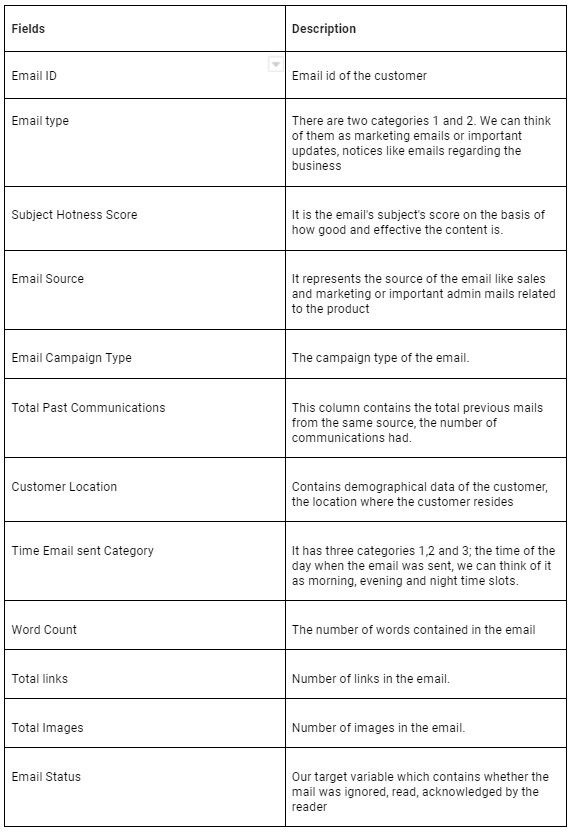

#### Duplicate Values

In [20]:
# Dataset Duplicate Value Count
print(f'we have {len(df[df.duplicated()])} duplicate values')

we have 0 duplicate values


#### Missing Values/Null Values

In [21]:
# Missing Values/Null Values Count
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

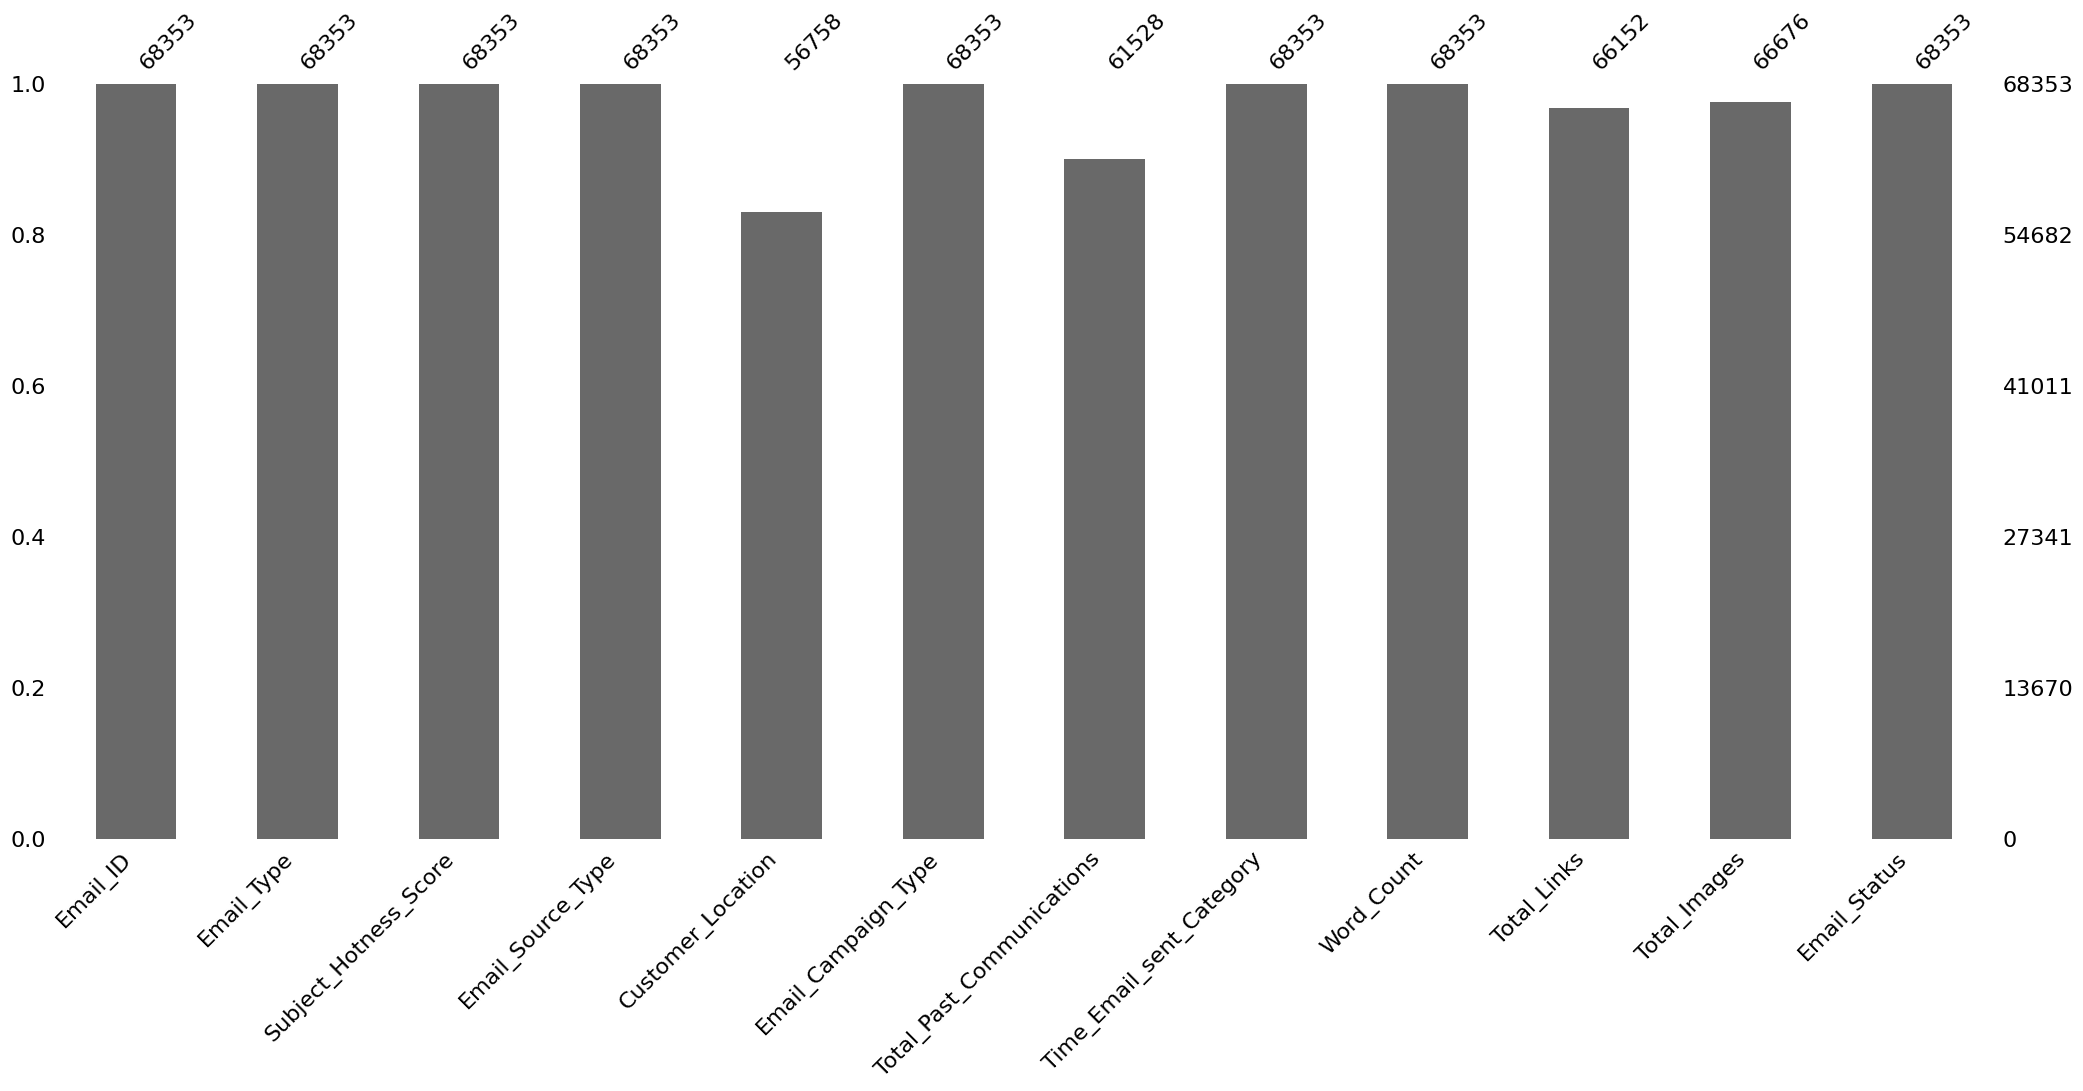

In [22]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

Dataset has 12 attributes and 68353 rows

Among the 12 atributes, 6 are categorical.
1.  email_type
2.  email_source_type
3.  costomer_location
4.  email_campaign_type
5.  time_email_sent_category
6.  email_status

Rest of others are continuous.

We have null values in costomer_location ,total_past_communications ,total_links and total_images


## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [24]:
# Dataset Describe
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description 

1.   Email_source, email_type are mostly contains 1 as min value , 25th and 50th percentiles values are 1 only so it might be possitively skewed


2.   Also the total_images and email_status have mostly 0 values as min and 25th and 50th percentile values are 0


3.   Time_email_sent_category contains mainly 2 that is evening time

### Check Unique Values for each variable.

In [26]:
# Check Unique Values for each variable.
df.nunique()

Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    45
Email_Status                     3
dtype: int64